## Alessandro Bolteri

# Progetto Fondamenti di Scienza di Dati e Laboratorio

#### Argomento: Videogiochi più venduti nella storia

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [27]:
vgsales = pd.read_csv('vgsales.csv')
vgsales = vgsales[(vgsales['Year'] > 0) & (vgsales['Year'] < 2015)]
display(vgsales.head(8))
print("Dataset: Video Game Sales")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


Dataset: Video Game Sales


## Domande:
### 1. Quali Piattaforme hanno più giochi in classifica?
### 2. Quali sono i Generi che spopolano di più nella classifica, divisi per regione (EU, USA, JP)?
### 3. Quali giochi hanno generato il maggior volume di Vendite per singolo genere?
### 4. Quali sono i Publisher che hanno venduto di più per paese?
### 5. Qual è la provenienza dei Publisher più presenti in classifica?
### 6. Qual è l'andamento delle Vendite riguardo ai migliori giochi in classifica negli anni?

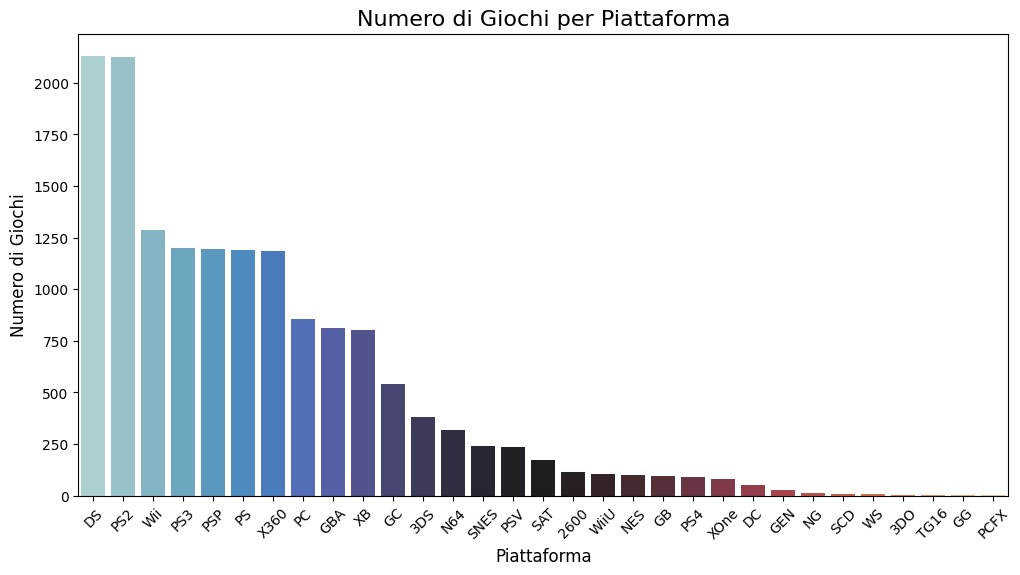

In [28]:
# 1. Quali piattaforme hanno più giochi in classifica?
platform_counts = vgsales['Platform'].value_counts()
fig = plt.figure(figsize=(12, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, hue=platform_counts.index, palette="icefire", dodge=False, legend=False)
plt.title('Numero di Giochi per Piattaforma', fontsize=16)
plt.xlabel('Piattaforma', fontsize=12)
plt.ylabel('Numero di Giochi', fontsize=12)
plt.xticks(rotation=45)
plt.show()

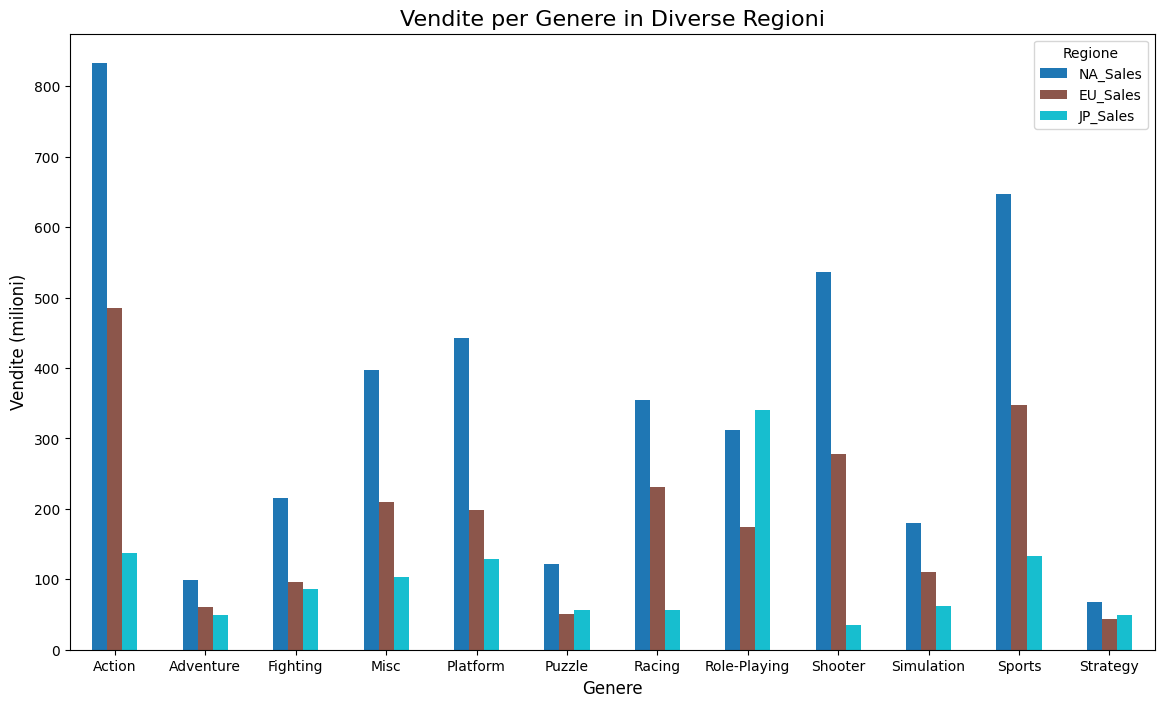

In [29]:
# 2. Quali sono i generi che spopolano di più nella classifica, divisi per regione?
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales']
genre_sales = vgsales.groupby('Genre')[regions].sum()
genre_sales.plot(kind='bar', figsize=(14, 8), cmap="tab10")
plt.title('Vendite per Genere in Diverse Regioni', fontsize=16)
plt.xlabel('Genere', fontsize=12)
plt.ylabel('Vendite (milioni)', fontsize=12)
plt.legend(title='Regione', fontsize=10)
plt.xticks(rotation=0)
plt.show()

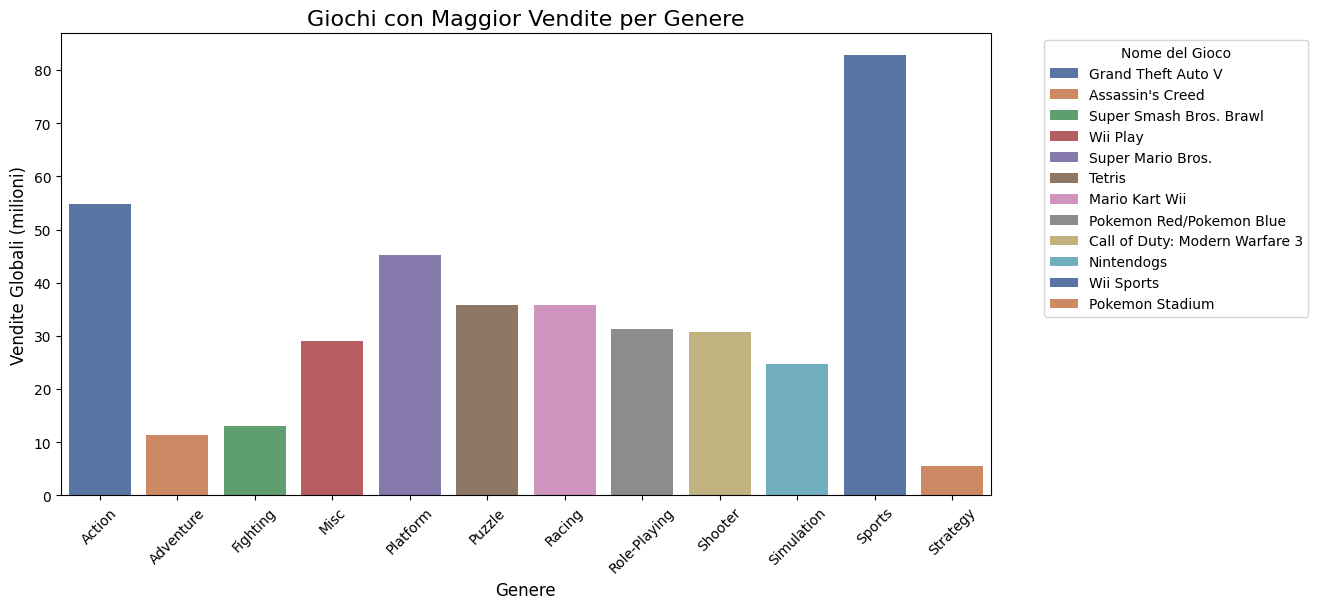

In [30]:
# 3. Quali giochi hanno generato il maggior volume di vendite per singolo genere?
game_sales = vgsales.groupby(['Genre', 'Name'])['Global_Sales'].sum().reset_index()
max_sales_per_genre = game_sales.loc[game_sales.groupby('Genre')['Global_Sales'].idxmax()]
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Global_Sales', hue='Name', data=max_sales_per_genre, dodge=False, palette='deep')
plt.title('Giochi con Maggior Vendite per Genere', fontsize=16)
plt.xlabel('Genere', fontsize=12)
plt.ylabel('Vendite Globali (milioni)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Nome del Gioco', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

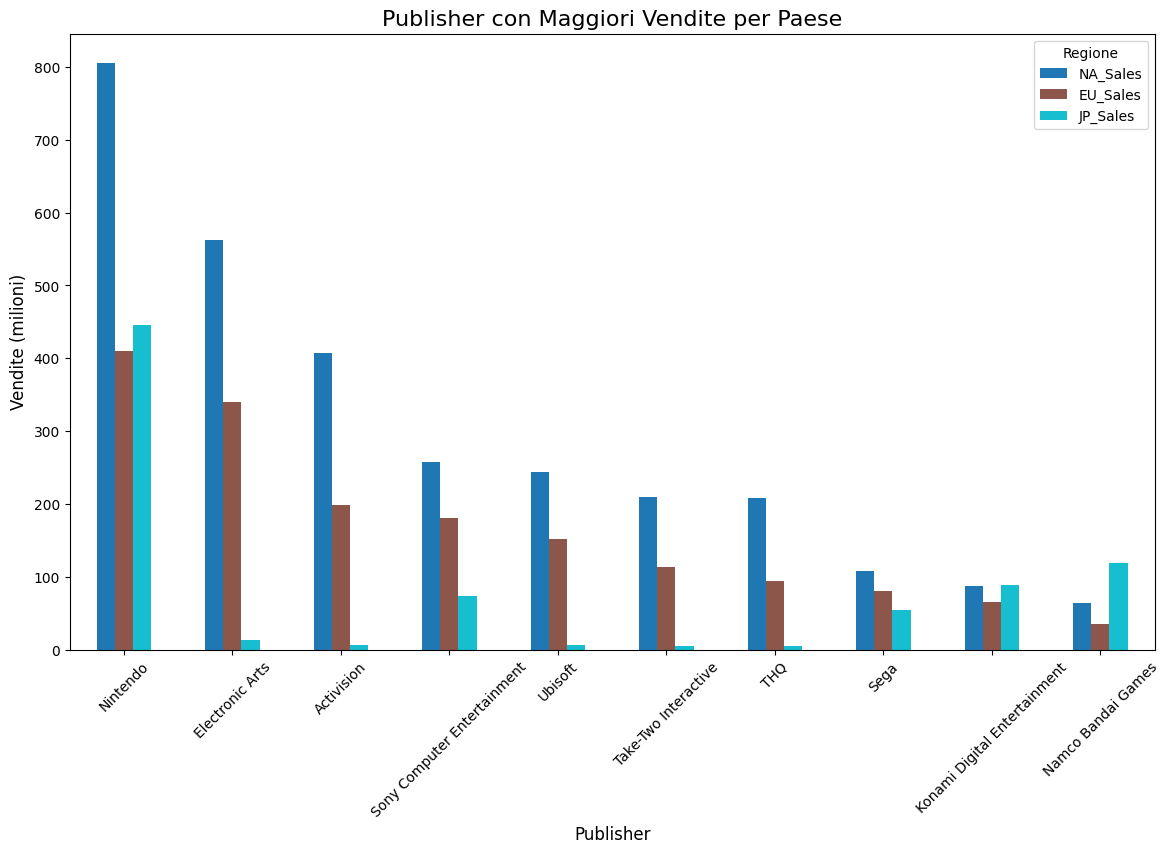

In [31]:
# 4. Publisher che hanno venduto di più per paese
publisher_sales = vgsales.groupby('Publisher')[regions].sum()
top_publishers = publisher_sales.sum(axis=1).sort_values(ascending=False).head(10).index

publisher_sales.loc[top_publishers].plot(
    kind='bar',
    figsize=(14, 8),
    colormap='tab10'
)

plt.title('Publisher con Maggiori Vendite per Paese', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Vendite (milioni)', fontsize=12)
plt.legend(title='Regione', fontsize=10)
plt.xticks(rotation=45)
plt.show()

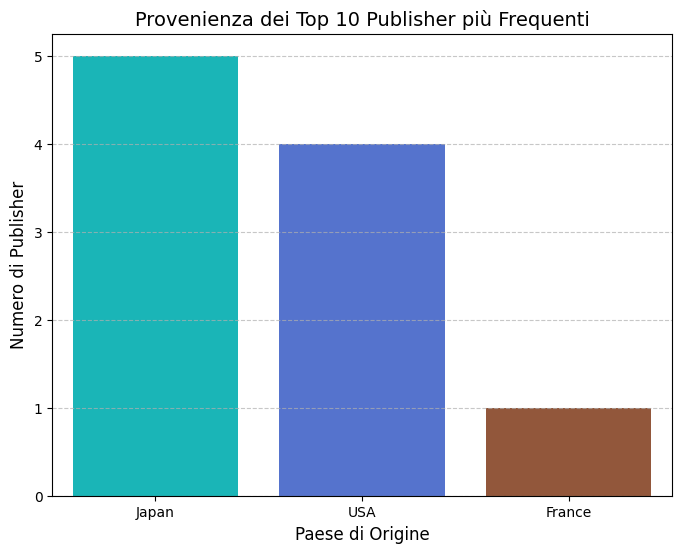

In [32]:
# 5. Provenienza dei Publisher più presenti in classifica (versione semplificata con grafico a barre)

# Conto dei publisher più frequenti
publisher_counts = vgsales['Publisher'].value_counts().head(10)

# Dizionario con la provenienza (paese) dei principali publisher
publisher_countries = {
    "Electronic Arts": "USA",
    "Activision": "USA",
    "Ubisoft": "France",
    "Namco Bandai Games": "Japan",
    "Konami Digital Entertainment": "Japan",
    "THQ": "USA",
    "Sony Computer Entertainment": "Japan",
    "Nintendo": "Japan",
    "Sega": "Japan",
    "Take-Two Interactive": "USA",
}

# Mappatura dei top publisher con il paese di provenienza
countries = publisher_counts.index.to_series().map(publisher_countries).fillna('Unknown')

# Conta quanti di questi publisher provengono da ciascun paese
country_counts = countries.value_counts()

# Colori per paese
country_colors = {
    "Japan": "#00ced1",
    "USA": "#4169e1",
    "France": "#a0522d",
    "Unknown": "#7f7f7f"
}

# Grafico
plt.figure(figsize=(8, 6))
sns.barplot(
    x=country_counts.index,
    y=country_counts.values,
    hue=country_counts.index,
    palette=[country_colors.get(country, "#7f7f7f") for country in country_counts.index],
    dodge=False,
    legend=False
)

plt.title("Provenienza dei Top 10 Publisher più Frequenti", fontsize=14)
plt.xlabel("Paese di Origine", fontsize=12)
plt.ylabel("Numero di Publisher", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


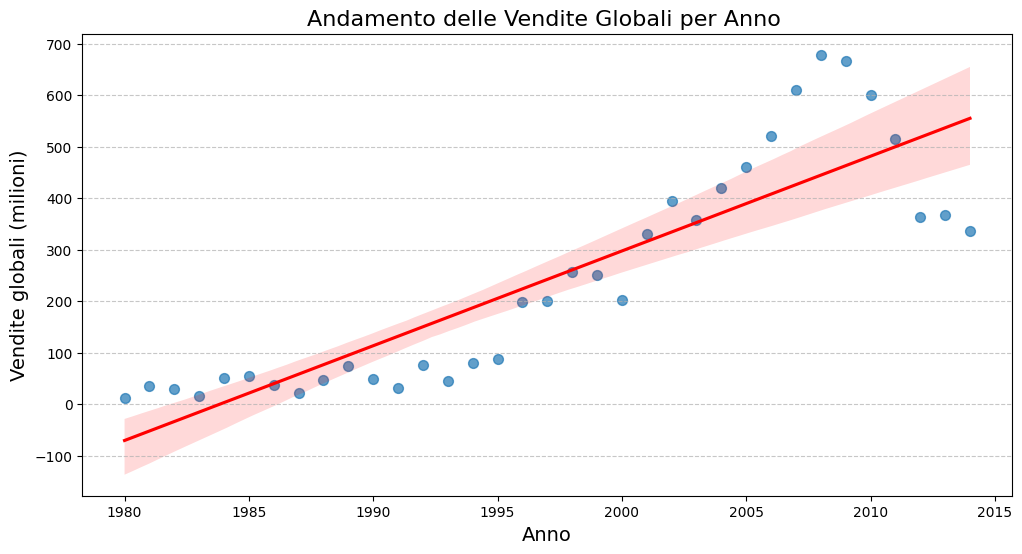

In [33]:
#6.	Qual è l'andamento delle vendite riguardo ai migliori giochi in classifica negli anni?

# Calcolo vendite totali per anno
sales_per_year = vgsales.groupby('Year')['Global_Sales'].sum().reset_index()

# Grafico con linea di regressione
plt.figure(figsize=(12, 6))
sns.regplot(
    data=sales_per_year,
    x='Year',
    y='Global_Sales',
    scatter_kws={'s': 50, 'alpha': 0.7},
    line_kws={'color': 'red'}
)
plt.title("Andamento delle Vendite Globali per Anno ", fontsize=16)
plt.xlabel("Anno", fontsize=14)
plt.ylabel("Vendite globali (milioni)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclusioni

#### - Le Piattaforme che primeggiano con il maggior numero di titoli sono il DS e la PS2
#### - In America ed Europa, il genere più popolare è l'Action, mentre in Giappone è l'RPG
#### - Ogni Genere ha un titolo di riferimento, come GTA V per l'Action e Pokemon Red/Blue per l'RPG
#### - Nintendo si conferma come il publisher con il maggior impatto sul mercato globale
#### - I Publisher migliori provengono da Giappone e USA
#### - Il Mercato videoludico mostra una crescita costante nel tempo, con un picco nel 2006